In [1]:
import numpy as np

### Inputs

In [2]:
np.random.seed(1)
X=np.random.randn(2,5)
Y=(np.random.randn(1,5)>0)

In [3]:
X,Y

(array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
        [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038]]),
 array([[ True, False, False, False,  True]]))

### Activation Functions

In [4]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [5]:
def tanh(z):
    return np.tanh(z)

In [6]:
def relu(x):
    s = np.maximum(0,x)
    return s

In [7]:
def leaky_relu(z):
    return np.maximum(0.01,z)

In [8]:
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

### Layer Size

In [9]:
def layer_size(X,Y):
    n_x = X.shape[0]
    n_h1 = 4
    n_h2 = 3
    n_h3 = 2
    n_y = Y.shape[0]
    return (n_x,n_h1,n_h2,n_h3,n_y)

In [10]:
n_x,n_h1,n_h2,n_h3,n_y = layer_size(X,Y)
n_x,n_h1,n_h2,n_h3,n_y

(2, 4, 3, 2, 1)

### Parameters (W, b)

In [11]:
def int_value(n_x,n_h1,n_h2,n_h3,n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h1,n_x)*0.01
    b1 = np.zeros(shape = (n_h1,1))
    W2 = np.random.randn(n_h2,n_h1)*0.01
    b2 = np.zeros(shape = (n_h2,1))
    W3 = np.random.randn(n_h3,n_h2)*0.01
    b3 = np.zeros(shape = (n_h3,1))
    W4 = np.random.randn(n_y,n_h3)*0.01
    b4 = np.zeros(shape = (n_y,1))
    
    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3':b3, 'W4':W4, 'b4':b4}
    return parameters

In [12]:
parameters = int_value(n_x,n_h1,n_h2,n_h3,n_y)
parameters

{'W1': array([[ 0.01624345, -0.00611756],
        [-0.00528172, -0.01072969],
        [ 0.00865408, -0.02301539],
        [ 0.01744812, -0.00761207]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.00319039, -0.0024937 ,  0.01462108, -0.02060141],
        [-0.00322417, -0.00384054,  0.01133769, -0.01099891],
        [-0.00172428, -0.00877858,  0.00042214,  0.00582815]]),
 'b2': array([[0.],
        [0.],
        [0.]]),
 'W3': array([[-0.01100619,  0.01144724,  0.00901591],
        [ 0.00502494,  0.00900856, -0.00683728]]),
 'b3': array([[0.],
        [0.]]),
 'W4': array([[-0.0012289 , -0.00935769]]),
 'b4': array([[0.]])}

### Step 1 : Forward Propogation

In [13]:
def fwd_prg(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    
    Z1 = np.dot(W1,X) + b1
    A1 = relu(Z1)  
    
    Z2 = np.dot(W2,A1) + b2
    A2 = relu(Z2)
    
    Z3 = np.dot(W3,A2) + b3
    A3 = np.tanh(Z3)
    
    Z4 = np.dot(W4,A3) + b4
    A4 = sigmoid(Z4)
    
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'Z3': Z3, 'A3': A3, 'Z4': Z4, 'A4': A4}
    
    return A4, cache

In [14]:
A4, cache =  fwd_prg(X, parameters)
A4

array([[0.5, 0.5, 0.5, 0.5, 0.5]])

### Step 2 : Calculate Cost

In [15]:
def compute_cost(A4,Y):
    m = Y.size
    cost = -np.sum(Y*np.log(A4)+(1-Y)*np.log(1-A4))/m
    return cost

In [16]:
cost = compute_cost(A4,Y)
cost

0.693147179166595

### Step 3 : Backward Propogation

In [17]:
def BWP(parameters, cache, X, Y):
    m = Y.size
    
    # parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    
    #cache
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    A4 = cache['A4']
    
    dZ4 = A4 - Y
    dW4 = np.dot(dZ4,A3.T)/m
    db4 = np.sum(dZ4, axis = 1, keepdims = True)/m
    
    dZ3 = np.dot(W4.T, dZ4)*(1 - np.power(A3,2))
    dW3 = np.dot(dZ3, A2.T)/m
    db3 = np.sum(dZ3, axis = 1, keepdims = True)/m
    
    dA2 = np.dot(W3.T,dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2>0))
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
    
    
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1>0))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    grades = {'dW1' : dW1, 'db1' : db1, 'dW2' : dW2, 'db2' : db2, 'dW3' : dW3, 'db3' : db3, 'dW4' : dW4, 'db4' : db4}
    
    return grades

In [18]:
grades = BWP(parameters, cache, X, Y)
grades

{'dW1': array([[-1.14467902e-08,  2.51293222e-08],
        [-2.38636201e-08, -3.58261127e-08],
        [ 3.39920342e-07, -2.41527634e-07],
        [-3.64597668e-07,  4.86481926e-07]]),
 'db1': array([[-2.78510990e-09],
        [ 4.64400219e-08],
        [-4.46633884e-09],
        [-2.38863662e-07]]),
 'dW2': array([[ 1.35542276e-07,  1.72783877e-08,  1.81146186e-07,
          1.53618418e-07],
        [ 3.98039514e-07,  5.07404864e-08,  5.31961997e-07,
          4.51122722e-07],
        [-2.96499848e-07, -8.52531639e-08, -4.24569789e-07,
         -3.32534558e-07]]),
 'db2': array([[ 3.62506689e-14],
        [ 1.06442528e-13],
        [-1.05802989e-05]]),
 'dW3': array([[-4.65408963e-09, -5.10785515e-09,  1.99229245e-08],
        [-3.54393915e-08, -3.88946697e-08,  1.51706645e-07]]),
 'db3': array([[-0.00012289],
        [-0.00093577]]),
 'dW4': array([[-1.40268449e-07,  1.67319686e-07]]),
 'db4': array([[0.1]])}

### Step 4 : Update Parameters

In [19]:
def update(parameters, grades, lr):
    
    #parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    
    #grades
    dW1 = grades['dW1']
    db1 = grades['db1']
    dW2 = grades['dW2']
    db2 = grades['db2']
    dW3 = grades['dW3']
    db3 = grades['db3']
    dW4 = grades['dW4']
    db4 = grades['db4']
    
    W1 = W1 - lr*dW1
    b1 = b1 - lr* db1
    W2 = W2 - lr* dW2
    b2 = b2 - lr* db2
    W3 = W3 - lr* dW3
    b3 = b3 - lr* db3
    W4 = W4 - lr* dW4
    b4 = b4 - lr* db4

    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3':b3, 'W4':W4, 'b4':b4}
    
    return parameters

In [20]:
parameters = update(parameters, grades, lr = 0.01)
parameters

{'W1': array([[ 0.01624345, -0.00611756],
        [-0.00528172, -0.01072969],
        [ 0.00865407, -0.02301538],
        [ 0.01744812, -0.00761207]]),
 'b1': array([[ 2.78510990e-11],
        [-4.64400219e-10],
        [ 4.46633884e-11],
        [ 2.38863662e-09]]),
 'W2': array([[ 0.00319039, -0.0024937 ,  0.01462108, -0.02060141],
        [-0.00322418, -0.00384054,  0.01133769, -0.01099892],
        [-0.00172428, -0.00877858,  0.00042214,  0.00582816]]),
 'b2': array([[-3.62506689e-16],
        [-1.06442528e-15],
        [ 1.05802989e-07]]),
 'W3': array([[-0.01100619,  0.01144724,  0.00901591],
        [ 0.00502494,  0.00900856, -0.00683728]]),
 'b3': array([[1.22890224e-06],
        [9.35769426e-06]]),
 'W4': array([[-0.0012289, -0.0093577]]),
 'b4': array([[-0.001]])}

### Entire Neural Network

In [21]:
def NN(X, Y, n_h1, n_h2, n_h3, epoch, print_cost):
    np.random.seed(1)
    n_x = layer_size(X,Y)[0]
    n_y = layer_size(X,Y)[4]
    
    parameters = int_value(n_x, n_h1, n_h2, n_h3 ,n_y)
    past_cost = []
    for i in range(epoch):
        A4,cache = fwd_prg(X, parameters)
        
        cost = compute_cost(A4,Y)
        past_cost.append(cost)
        
        grades = BWP(parameters, cache, X, Y)
        
        parameters = update(parameters, grades, lr = 0.1)
        
        if print_cost and i%10000 == 0:
            print(cost)
            
    return parameters, past_cost

In [22]:
parameters, cost = NN(X, Y, n_h1, n_h2, n_h3,epoch = 100000, print_cost = True)
parameters

0.693147179166595
0.6730116606730594
0.6730116523508691
0.6730116366313752
0.6730115964403446
0.6730114410001475
0.6730092838857301
0.0010076261136785654
0.00033202491560014165
0.00019892720036096204


{'W1': array([[ 0.59929675, -0.10934447],
        [-0.00522299, -0.00619478],
        [ 0.19086776, -0.05010794],
        [ 1.48859952, -0.26932849]]),
 'b1': array([[ 0.2332978 ],
        [-0.00451169],
        [ 0.06266842],
        [ 0.58122173]]),
 'W2': array([[-0.18970472, -0.00179   , -0.04461868, -0.48885628],
        [-0.21350806, -0.00345976, -0.05535884, -0.51857208],
        [ 0.58620463, -0.00507693,  0.19373899,  1.45540906]]),
 'b2': array([[ 1.10527592e+00],
        [ 1.18395293e+00],
        [-3.76348274e-07]]),
 'W3': array([[-0.72402784, -0.75644519,  0.92370649],
        [ 0.98674495,  1.07090073, -1.28297626]]),
 'b3': array([[-0.4910573 ],
        [ 0.58852474]]),
 'W4': array([[ 3.35082589, -5.55738068]]),
 'b4': array([[-0.28711858]])}

### Cost Graph

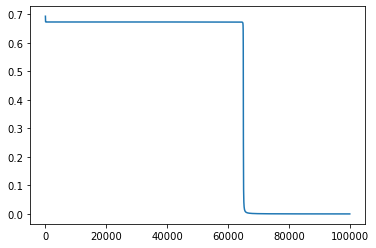

In [23]:
import matplotlib.pyplot as plt
plt.plot(cost)
plt.show()